In [1]:
%load_ext lab_black

In [2]:
from sklearn import datasets
import numpy as np

In [5]:
iris = datasets.load_iris()

In [7]:
X = iris.data[:, [2, 3]]
y = iris.target

array([0, 1, 2])

In [8]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割 全体の30％をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

シャッフルしたテストデータのラベルの比率が一定か確認する

In [11]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算 標準偏差ってなんだっけ・・・
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
from sklearn.linear_model import Perceptron

In [18]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [20]:
y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d" % (y_test != y_pred).sum())

Misclassified examples: 1


In [21]:
from sklearn.metrics import accuracy_score

In [23]:
print("AccuracyL %.3f" % accuracy_score(y_test, y_pred))
print("AccuracyL %.3f" % ppn.score(X_test_std, y_test))

AccuracyL 0.978
AccuracyL 0.978


In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            color=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor="black",
        )

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        if LooseVersion(matplotlib.__version__) < LooseVersion("0.3.4"):
            plt.scatter(
                X_test[:, 0],
                X_test[:, 1],
                c="",
                edgecolor="black",
                alpha=1.0,
                linewidth=1,
                marker="o",
                s=100,
                label="test set",
            )
        else:
            plt.scatter(
                X_test[:, 0],
                X_test[:, 1],
                c="none",
                edgecolor="black",
                alpha=1.0,
                linewidth=1,
                marker="o",
                s=100,
                label="test set",
            )

/tmp/ipykernel_1568/2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


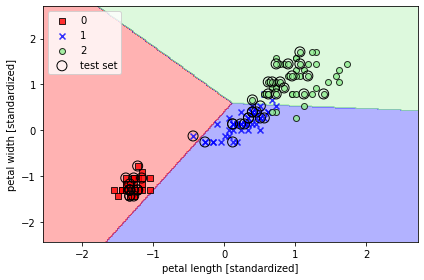

In [28]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150)
)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

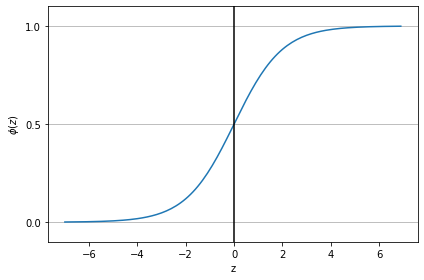

In [29]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

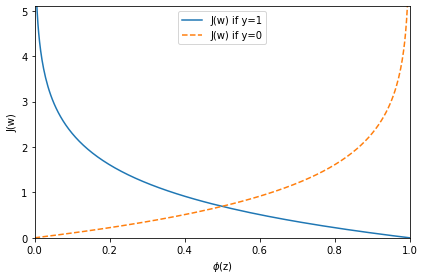

In [33]:
def cost_1(z):
    return -np.log(sigmoid(z))


def cost_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label="J(w) if y=1")

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle="--", label="J(w) if y=0")

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel("$\phi$(z)")
plt.ylabel("J(w)")
plt.legend(loc="best")
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

In [35]:
from logistic_regression_gd import LogisticRegressionGD

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

ValueError: either both or neither of x and y should be given